In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from FasterCoco import FFTConvolver

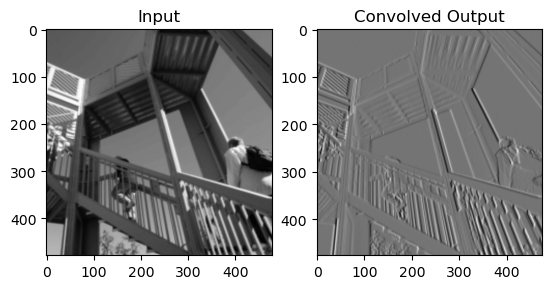

In [2]:
# Load and preprocess image
img = Image.open("example.jpg").convert("L")  # Convert to grayscale
img_np = np.array(img, dtype=np.float32) / 255.0

# Shape it to (Batch, Channel, Height, Width)
input_tensor = img_np[None, None, :, :]

# Example kernel: simple 3x3 Sobel filter
sobel_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

# Shape to (C, H, W) where C matches input channels
kernel_tensor = sobel_kernel[None, :, :]  # Assuming single channel

# Call C++ FFT-based convolver
convolver = FFTConvolver()
output = convolver.convolve(input_tensor, kernel_tensor)

# Display result
plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(img_np, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Convolved Output")
plt.imshow(output[0, 0], cmap="gray")
plt.show()